In [1]:

import sys
import os
import json
import matplotlib.pyplot as plt


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.utils.visualization import plot_results

# Adjust the file path as needed based on your current working directory
config_file = '../examples/example_economic_model.json'
config = ConfigManager.load_config(config_file)

# Step 4: Run Enhanced Economic Simulation
economic_model = EconomicModel(
    config['total_supply'], 
    config['initial_distribution'], 
    config['fee_rate'],
    config['transaction_volume'],
    config['staking_rewards'],
    config['lock_up_periods']
)

economics = economic_model.simulate_economics()

distribution = list(economics['distribution'].values())
fees_collected = [economics['fees_collected']]
token_burned = [economics['token_burned']]
staking_rewards = list(economics['staking_rewards'].values())
inflation_tokens = [economics['inflation_tokens']]
deflation_tokens = [economics['deflation_tokens']]
primary_to_secondary = [economics['primary_to_secondary']]
secondary_token_supply = [economics['secondary_token_supply']]
economic_scenarios = list(economics['economic_scenarios'].values())

# Combine data for plotting
plot_data = {
    'distribution': distribution,
    'fees_collected': fees_collected,
    'token_burned': token_burned,
    'staking_rewards': staking_rewards,
    'inflation_tokens': inflation_tokens,
    'deflation_tokens': deflation_tokens,
    'primary_to_secondary': primary_to_secondary,
    'secondary_token_supply': secondary_token_supply,
    'economic_scenarios': economic_scenarios,
    'current_supply': [economics['current_supply']]
}


Plotting data: {'distribution': [20000000.0, 50000000.0, 30000000.0], 'fees_collected': [1000.0], 'token_burned': [500.0], 'staking_rewards': [0.015, 0.18, 0.5475], 'inflation_tokens': [1999990.0148500002], 'deflation_tokens': [999995.0074250001], 'primary_to_secondary': [10000.0], 'secondary_token_supply': [490000.0], 'economic_scenarios': [150000.0, 50000.0, 10000000.0], 'current_supply': [100999495.749925]}


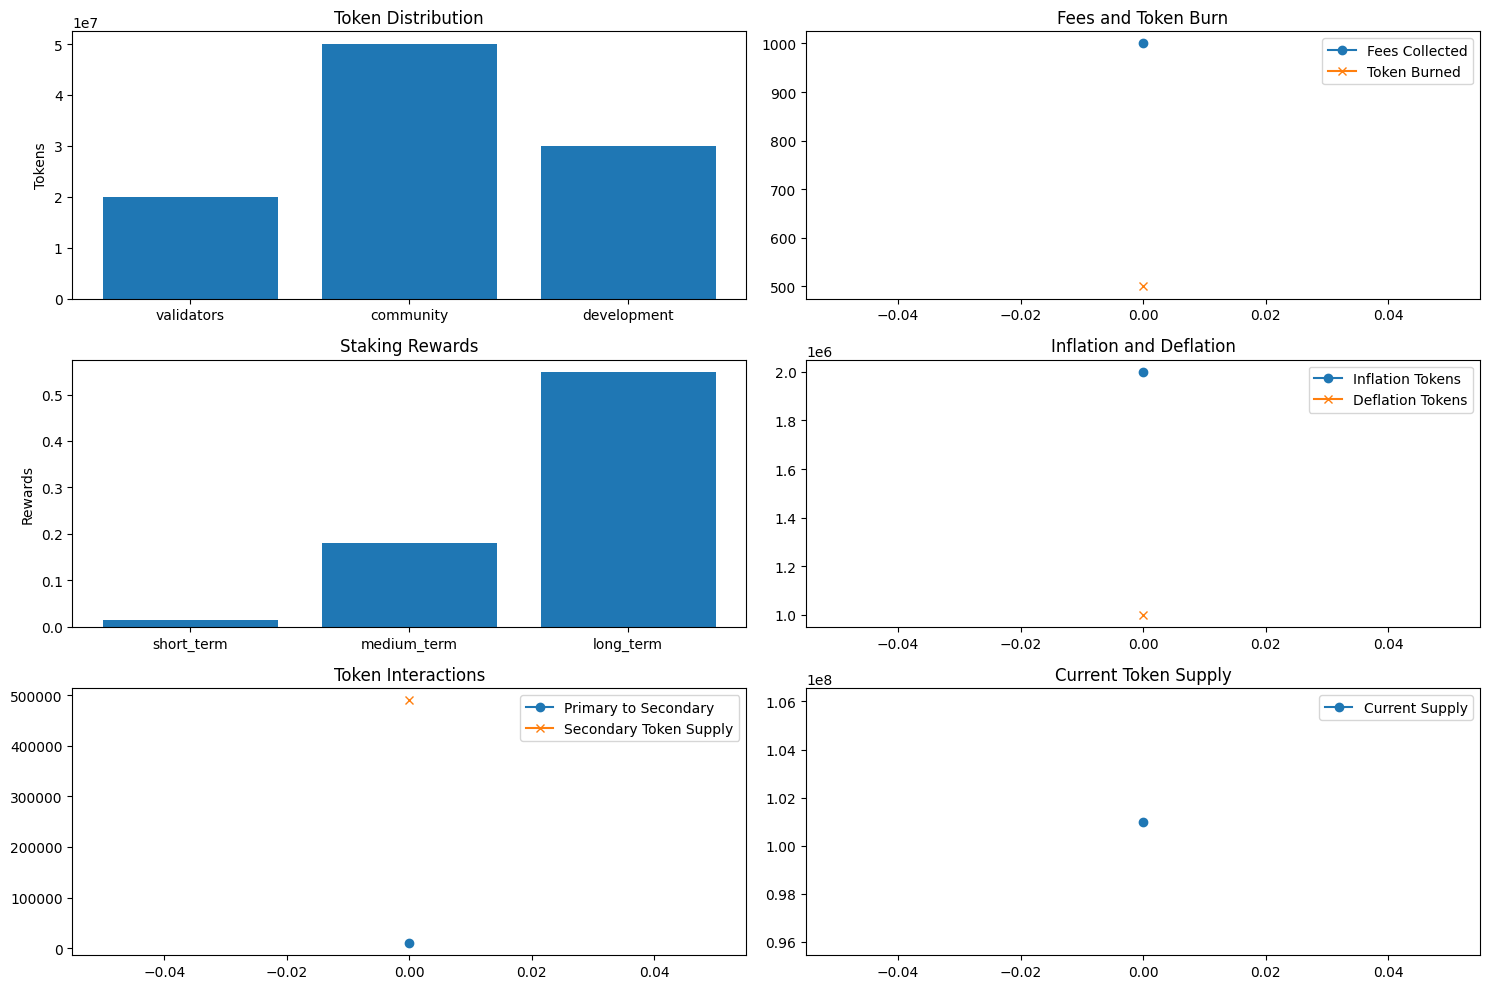

In [2]:
import matplotlib.pyplot as plt

def plot_results(data):
    print("Plotting data:", data)  # Debugging print
    
    # Create subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 10))

    # Plot distribution
    if 'distribution' in data:
        axs[0, 0].bar(['validators', 'community', 'development'], data['distribution'])
        axs[0, 0].set_title('Token Distribution')
        axs[0, 0].set_ylabel('Tokens')

    # Plot fees collected and token burned
    if 'fees_collected' in data and 'token_burned' in data:
        axs[0, 1].plot(data['fees_collected'], label='Fees Collected', marker='o')
        axs[0, 1].plot(data['token_burned'], label='Token Burned', marker='x')
        axs[0, 1].set_title('Fees and Token Burn')
        axs[0, 1].legend()

    # Plot staking rewards
    if 'staking_rewards' in data:
        axs[1, 0].bar(['short_term', 'medium_term', 'long_term'], data['staking_rewards'])
        axs[1, 0].set_title('Staking Rewards')
        axs[1, 0].set_ylabel('Rewards')

    # Plot inflation and deflation tokens
    if 'inflation_tokens' in data and 'deflation_tokens' in data:
        axs[1, 1].plot(data['inflation_tokens'], label='Inflation Tokens', marker='o')
        axs[1, 1].plot(data['deflation_tokens'], label='Deflation Tokens', marker='x')
        axs[1, 1].set_title('Inflation and Deflation')
        axs[1, 1].legend()

    # Plot primary to secondary token conversion and supply
    if 'primary_to_secondary' in data and 'secondary_token_supply' in data:
        axs[2, 0].plot(data['primary_to_secondary'], label='Primary to Secondary', marker='o')
        axs[2, 0].plot(data['secondary_token_supply'], label='Secondary Token Supply', marker='x')
        axs[2, 0].set_title('Token Interactions')
        axs[2, 0].legend()

    # Plot current supply
    if 'current_supply' in data:
        axs[2, 1].plot(data['current_supply'], label='Current Supply', marker='o')
        axs[2, 1].set_title('Current Token Supply')
        axs[2, 1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()
plot_results(plot_data)